# Students performance

We are trying to predict the performance index

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading dataset

In [20]:
df = pd.read_csv('student_performance.csv')

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


### Checking for missing values

In [11]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

### Transforming column names into simple values

In [21]:
df.columns = ['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_practiced', 'performance_index']

In [15]:
df.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_practiced,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hours_studied               10000 non-null  int64  
 1   previous_scores             10000 non-null  int64  
 2   extracurricular_activities  10000 non-null  object 
 3   sleep_hours                 10000 non-null  int64  
 4   sample_question_practiced   10000 non-null  int64  
 5   performance_index           10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


### Transforming objects to numeric values

In [40]:
df['extracurricular_activities'].value_counts()

No     5052
Yes    4948
Name: extracurricular_activities, dtype: int64

In [4]:
df['extracurricular_activities'] = df['extracurricular_activities'].replace({'Yes': 1, 'No': 0})

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hours_studied               10000 non-null  int64  
 1   previous_scores             10000 non-null  int64  
 2   extracurricular_activities  10000 non-null  int64  
 3   sleep_hours                 10000 non-null  int64  
 4   sample_question_practiced   10000 non-null  int64  
 5   performance_index           10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


## Exploratory Data Analisis

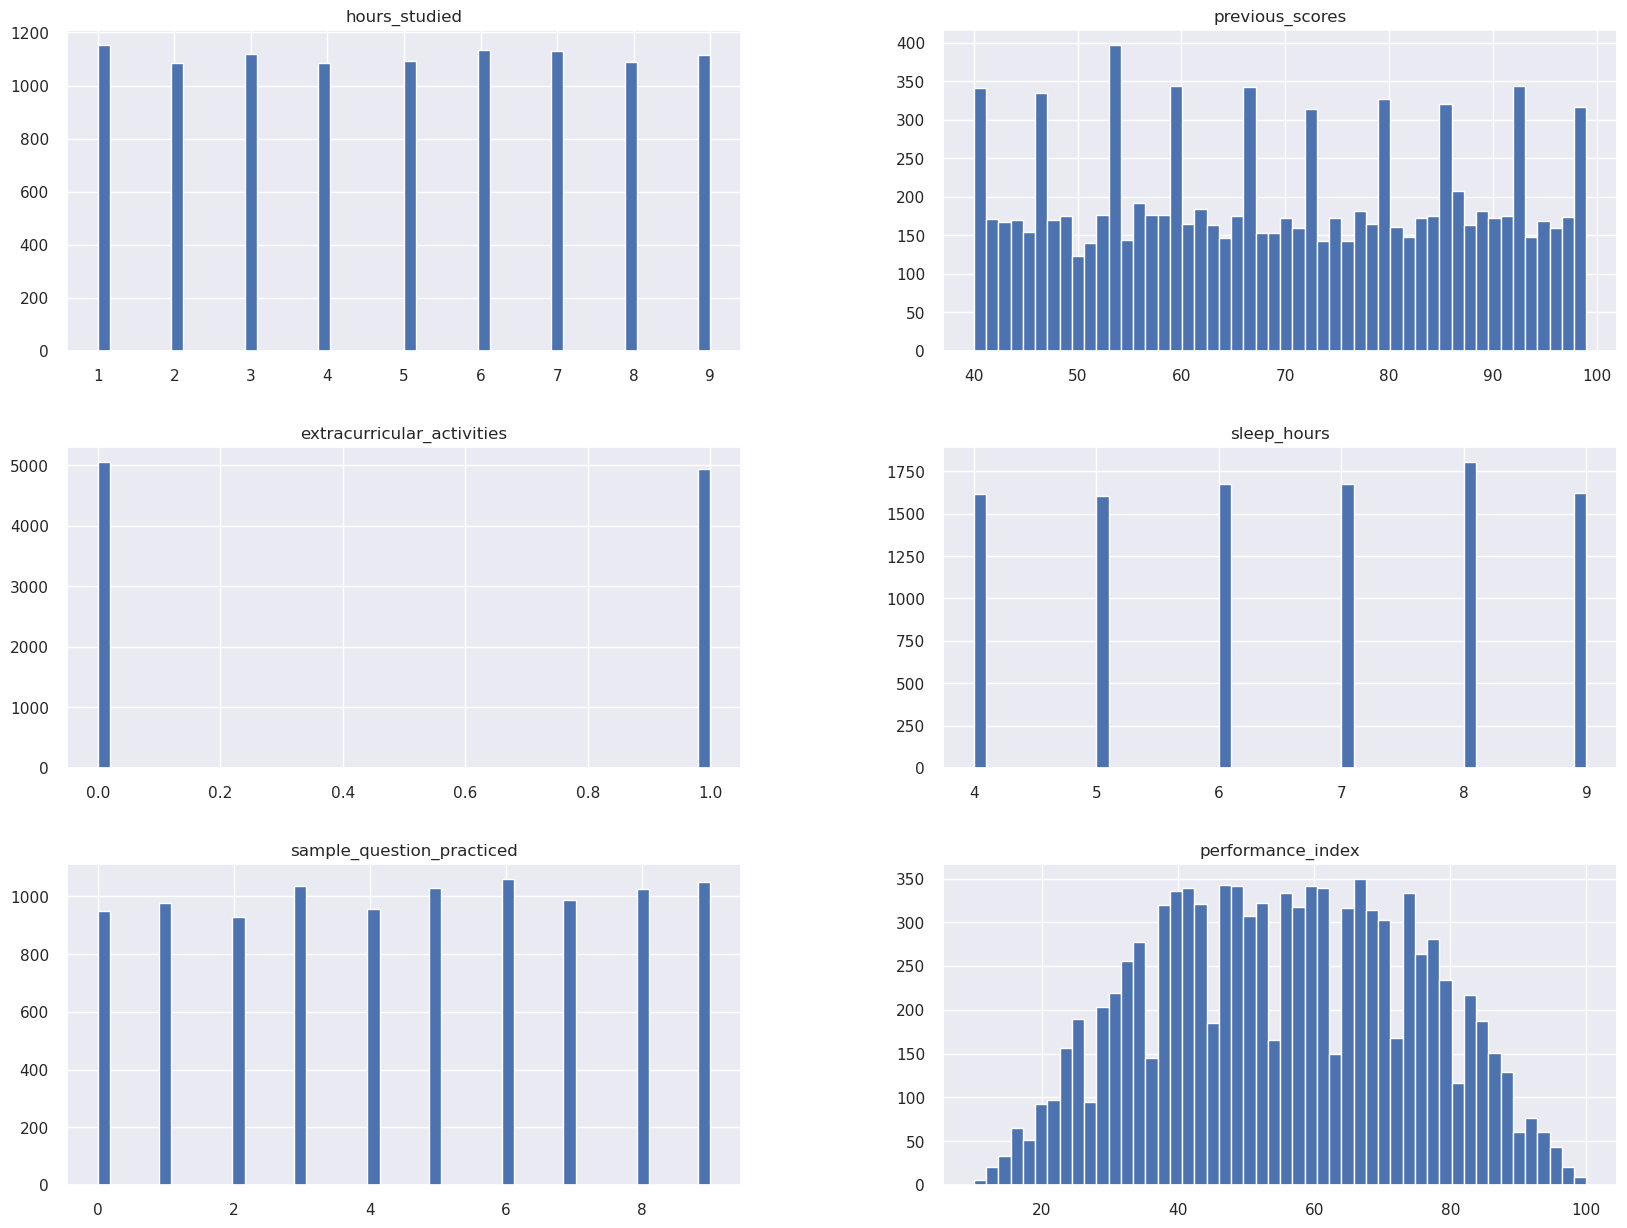

In [43]:
sns.set() # Aplies the seaborn style to all charts
df.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

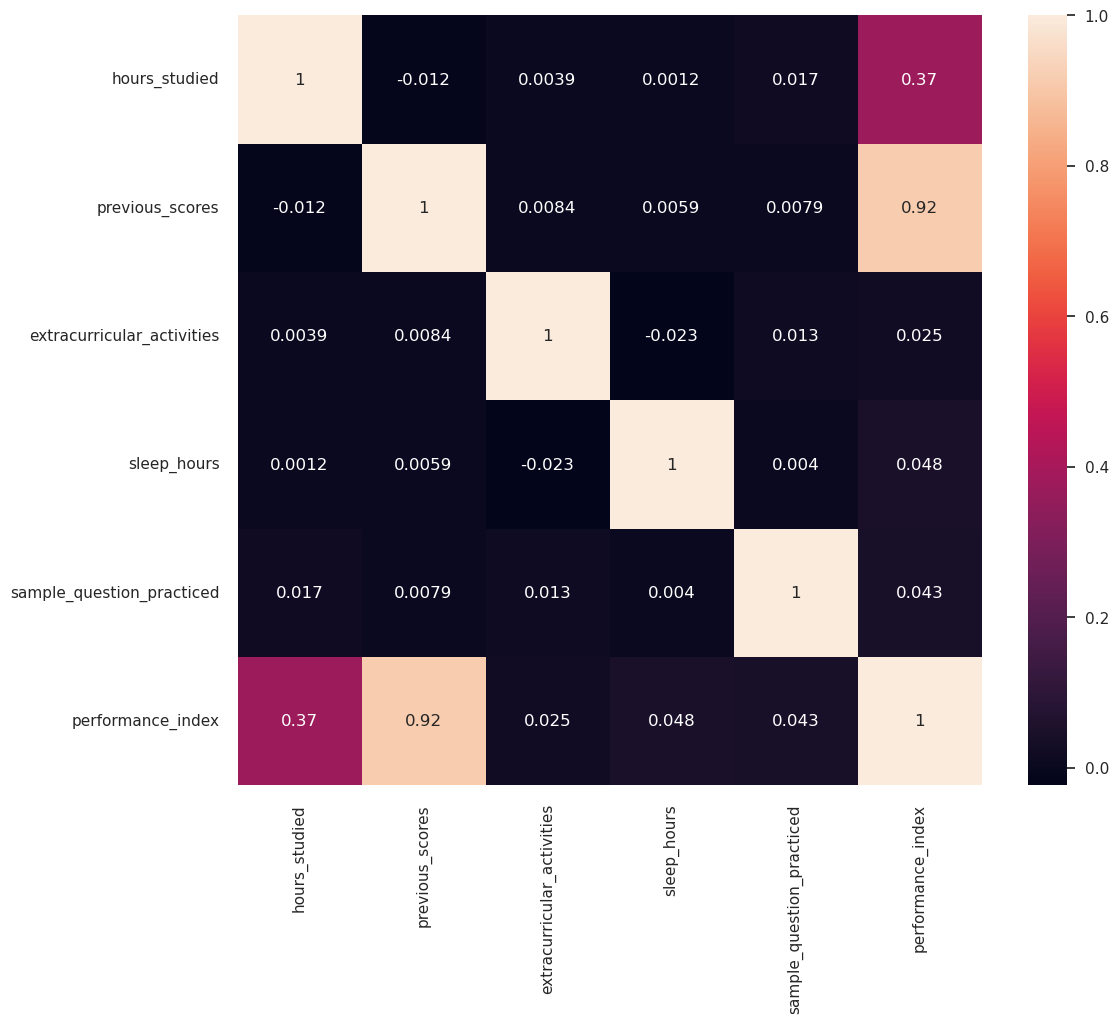

In [27]:
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr, annot=True)

### Findings
1. `previous_scores` has a high correlation with performance_index
2. `extracurricular_activities` it is a binary feature, which could impact the performance of the prediction model. 

### Bloxpots (Finding for outliers)

#### previous_scores

<Axes: >

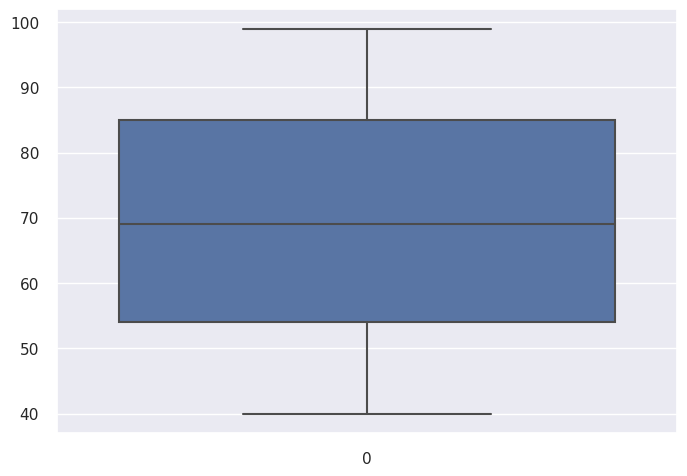

In [29]:
sns.boxplot(df['previous_scores'])

#### extracurricular_activities

<Axes: >

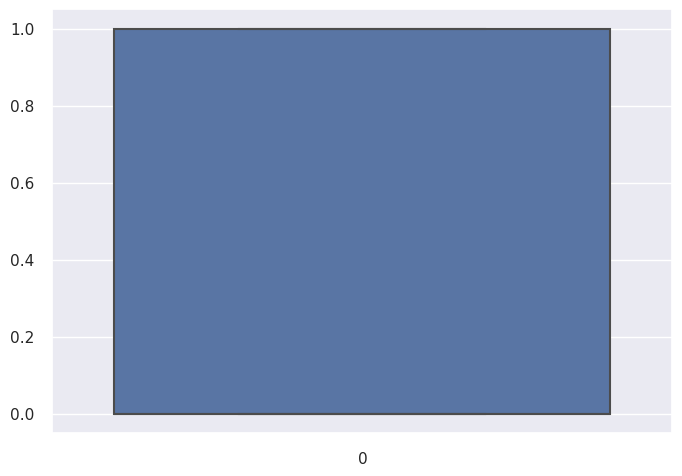

In [31]:
sns.boxplot(df['extracurricular_activities'])

## Creating a new dataset with important features

In [22]:
drop_features = ['hours_studied', 'sleep_hours', 'sample_question_practiced', 'extracurricular_activities']
dependent_features = ['previous_scores']
independent_feature = 'performance_index'

In [6]:
df = df.drop(drop_features, axis=1)

In [46]:
df.head()

,previous_scores,extracurricular_activities,performance_index
0,99,1,91.0
1,82,0,65.0
2,51,1,45.0
3,52,1,36.0
4,75,0,66.0


## Scatter Plot

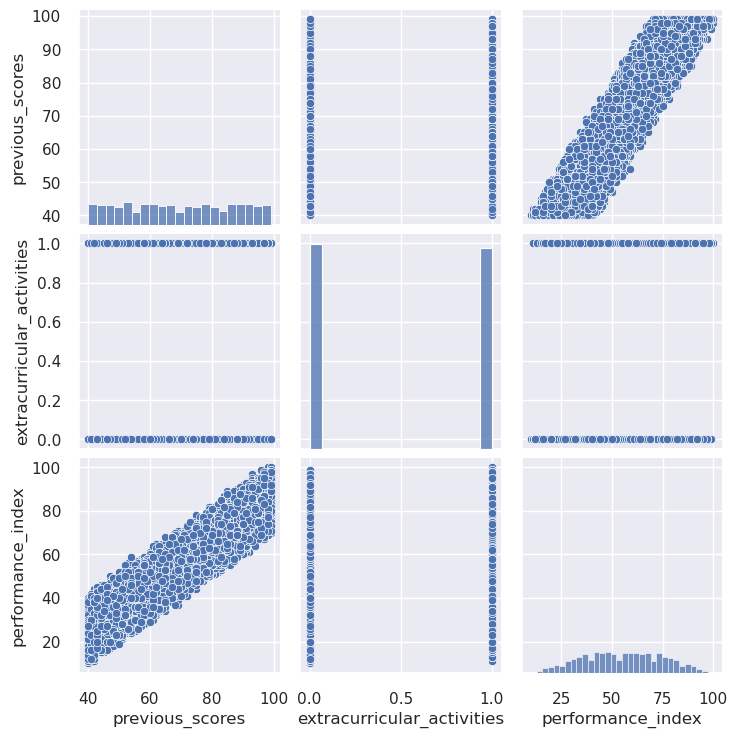

In [47]:
sns.pairplot(df)

## Traing Test Split

In [23]:
X=df[dependent_features]
y=df[independent_feature]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Feature selection based on correlation

In [25]:
X_train.corr()

,previous_scores
previous_scores,1.0


### Check for multicollinearity

<Axes: >

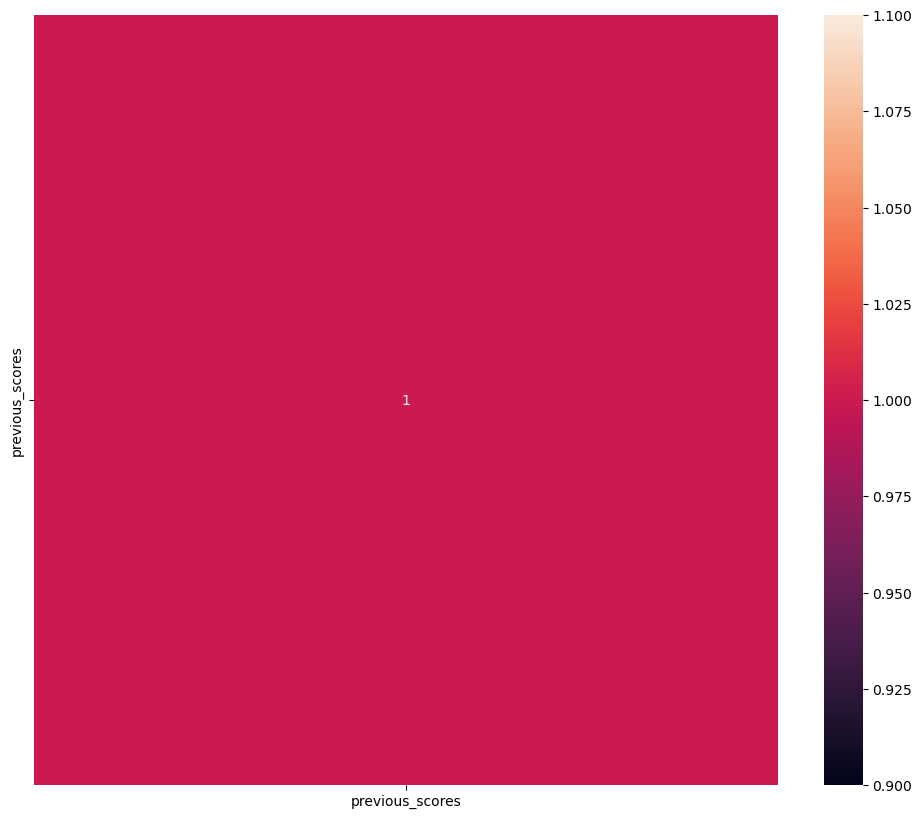

In [26]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [59]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [66]:
## Threshold--Domain Expertise
correlation(X_train, 0.90)

set()

**You can drop the features returned by the correlation function. Remember that threshold can be defined by product manager or domain expert**

## Model Training

### Standarization

In [9]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

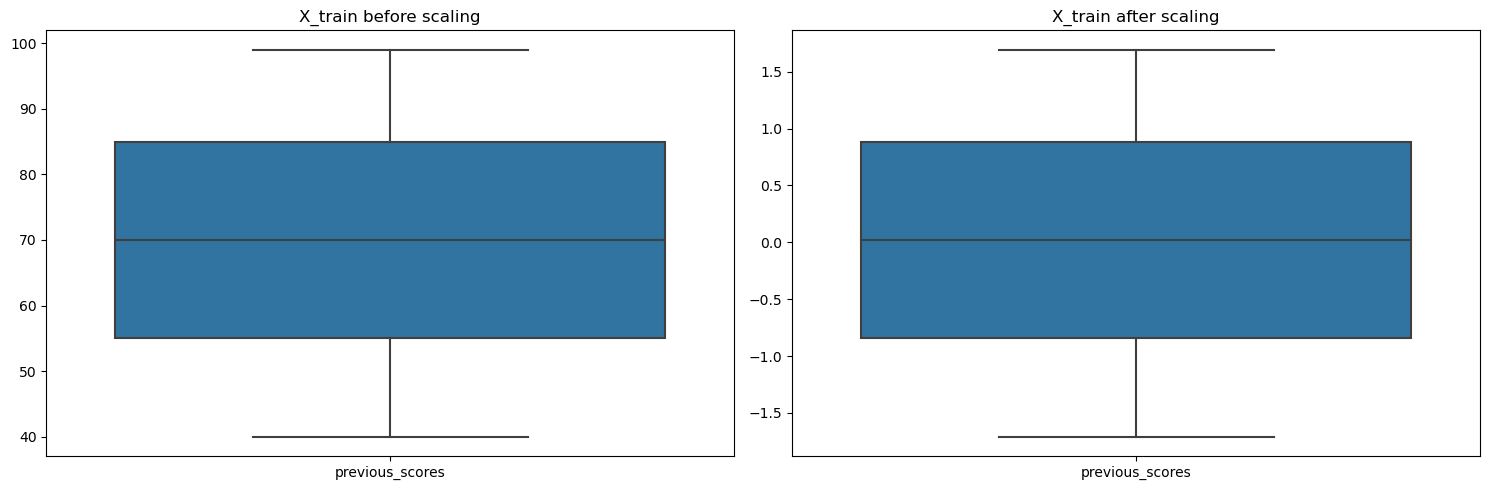

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title('X_train before scaling')

sns.boxplot(data=X_train_scaled, ax=axes[1])
axes[1].set_title('X_train after scaling')

plt.tight_layout()
plt.show()


### Model generation

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean Absolute Error  6.556835299302379
R2 Score  0.8391308808078455


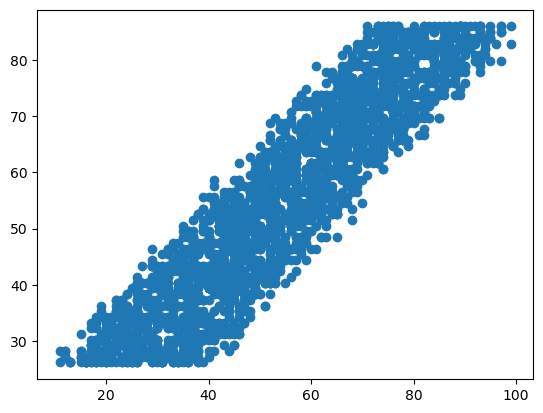

In [29]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error ", mae)
print("R2 Score ", score)

plt.scatter(y_test, y_pred)

In [30]:
## Coefficients
linreg.coef_

array([17.57197012])

### Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean Absolute Error  6.578733347496486
R2 Score  0.8362630978511029


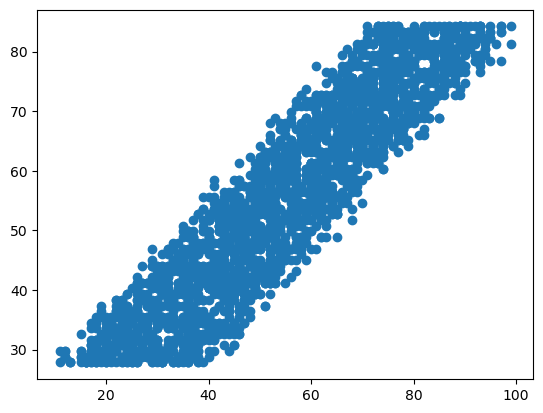

In [32]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error ", mae)
print("R2 Score ", score)

plt.scatter(y_test, y_pred)

In [33]:
## Coefficients
lasso.coef_

array([16.57197012])

### Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean Absolute Error  6.5568361611262285
R2 Score  0.8391305060065484


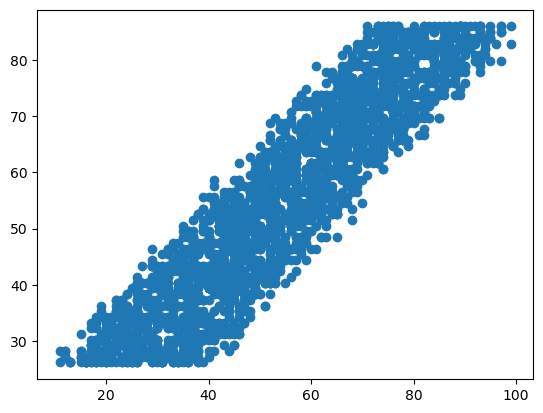

In [35]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error ", mae)
print("R2 Score ", score)

plt.scatter(y_test, y_pred)

In [38]:
## Coefficients
ridge.coef_

array([17.5696275])

### ElasticNet Regression

In [36]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean Absolute Error  7.996972631037712
R2 Score  0.734162126623793


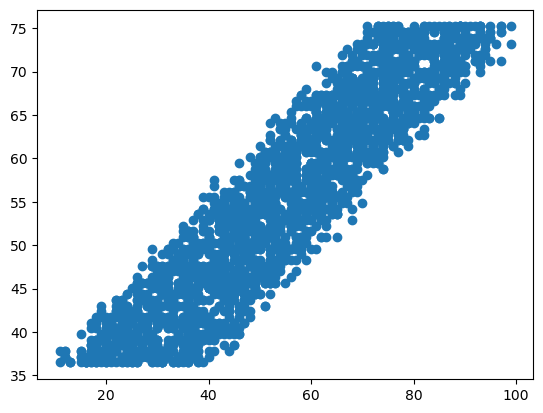

In [37]:
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)

y_pred = elastic.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error ", mae)
print("R2 Score ", score)

plt.scatter(y_test, y_pred)

In [39]:
## Coefficients
elastic.coef_

array([11.38131341])

## Lasso with Cross Validation

In [42]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [44]:
lassocv.alpha_

0.017571970121795896

In [45]:
lassocv.alphas_

array([1.75719701e+01, 1.63876781e+01, 1.52832035e+01, 1.42531667e+01,
       1.32925510e+01, 1.23966775e+01, 1.15611830e+01, 1.07819979e+01,
       1.00553274e+01, 9.37763194e+00, 8.74561094e+00, 8.15618603e+00,
       7.60648639e+00, 7.09383466e+00, 6.61573395e+00, 6.16985562e+00,
       5.75402801e+00, 5.36622578e+00, 5.00456012e+00, 4.66726952e+00,
       4.35271117e+00, 4.05935301e+00, 3.78576620e+00, 3.53061823e+00,
       3.29266638e+00, 3.07075168e+00, 2.86379330e+00, 2.67078321e+00,
       2.49078136e+00, 2.32291104e+00, 2.16635461e+00, 2.02034956e+00,
       1.88418476e+00, 1.75719701e+00, 1.63876781e+00, 1.52832035e+00,
       1.42531667e+00, 1.32925510e+00, 1.23966775e+00, 1.15611830e+00,
       1.07819979e+00, 1.00553274e+00, 9.37763194e-01, 8.74561094e-01,
       8.15618603e-01, 7.60648639e-01, 7.09383466e-01, 6.61573395e-01,
       6.16985562e-01, 5.75402801e-01, 5.36622578e-01, 5.00456012e-01,
       4.66726952e-01, 4.35271117e-01, 4.05935301e-01, 3.78576620e-01,
      

In [46]:
lassocv.mse_path_

array([[378.36664358, 363.43658143, 359.96451857, 369.64676633,
        369.21547833],
       [340.38522088, 323.84591363, 321.29187854, 330.62954441,
        329.13692591],
       [304.29231443, 289.41380223, 287.64991005, 294.86779732,
        294.09744754],
       [272.86765431, 259.46821662, 258.38379974, 263.80819036,
        263.61564735],
       [245.5054135 , 233.42466716, 232.9239949 , 236.8352904 ,
        237.09830435],
       [221.67852516, 210.77480234, 210.77510021, 213.4140256 ,
        214.0294368 ],
       [200.92843409, 191.07649117, 191.50622048, 193.07920469,
        193.96024363],
       [182.85618244, 173.94519742, 174.74256117, 175.42640244,
        176.50035588],
       [167.11465583, 159.04647739, 160.15812286, 160.104033  ,
        161.31022749],
       [153.40183885, 146.08945487, 147.46934709, 146.80645659,
        148.09451715],
       [141.4549485 , 134.82114604, 136.42958985, 135.26798477,
        136.59633204],
       [131.04533124, 125.0215236 , 126.824

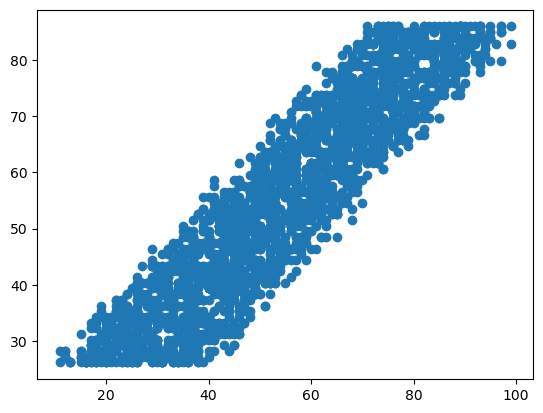

In [48]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

In [49]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error ", mae)
print("R2 Score ", score)

Mean Absolute Error  6.556841763843076
R2 Score  0.8391273430907186
